In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation #LDA

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diame\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stops_es = set(stopwords.words('spanish'))
stops_es = stops_es.union({
    "así", "si", "hacer", "cosas", "creo", "cómo", "solo", "aquí", "risas",
    "ser", "años", "gente", "vez", "historia", "ahora", "entonces", "bien",
    "pueden", "puede", "bueno", "aplausos", "ee", "uu", "datos", "personas",
    "hace", "hoy", "cada", "podemos", "ver", "dos", "luego", "hecho",
    "realmente", "tan", "decir","saben", "ustedes","dijo","voy","quiero",
    "bf","dh","número","des","gran","día","puedo","mismo","tres","hombres",
    "mujeres","hombre","mujer","hacia","sólo","solo","manera","tipo","mejor",
    "tener","alguien","después","gracias","menos","ejemplo","parte","respuesta",
    "forma","todas","muchas","lugar","poder","incluso","sino","idea","nunca",
    "dije","momento","siempre","podría","veces","ahí","sido","allí","dice","va"
})

In [30]:
stops_es =list(stops_es)

In [31]:
df = pd.read_csv('ted_talks_es.csv')

In [32]:
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Al Gore sobre cómo evitar la crisis climática,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523396,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,Con el mismo humor y humanidad que irradió en ...,Muchas gracias Chris. Y es en verdad un gran h...
1,7,"David Pogue dice ""La Simplicidad Vende""",David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920803,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,"El columnista del New York Times, David Pogue,...","Hola contestadora automática, mi vieja amiga. ..."
2,53,Un recorrido por la renovación urbana de la ma...,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664029,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"En una charla altamente emotiva, la activista ...","Si están presentes aquí hoy, y estoy muy conte..."
3,66,Ken Robinson dice que las escuelas matan la cr...,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65052534,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson plantea de manera entretenida...,"Buenos días. ¿Cómo están? Ha sido increíble, ¿..."
4,92,Hans Rosling nos muestra las mejores estadísti...,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501766,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,Una manera única de presentar datos. Con la en...,"Hace unos 10 años, emprendí la tarea de enseña..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,60135,Lo que falta en la narrativa de los inmigrante...,Elizabeth Camarillo Gutierrez,{0: 'Elizabeth Camarillo Gutierrez'},{0: ['analyst']},{0: 'Elizabeth Camarillo Gutierrez is a corpor...,594541,2020-02-05,2020-04-21,TED@WellsFargo,en,"['en', 'es']",15.0,653,"['life', 'society', 'immigration', 'humanity',...",{50657: 'A personal plea for humanity at the U...,https://www.ted.com/talks/elizabeth_camarillo_...,Al contar su historia de encontrar oportunidad...,"Hola a todos, me llamo Elizabeth y trabajo en ..."
3917,62707,El ciclo vital de una zapatilla - Angel Chang,Angel Chang,{0: 'Angel Chang'},NaN,{0: 'Angel Chang is a womenswear designer work...,219254,2020-04-23,2020-04-23,TED-Ed,en,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,https://www.ted.com/talks/angel_chang_the_wild...,Ver la lección completa en: https://ed.ted.co...,"Los australianos los llaman ""runners"". Los bri..."
3918,62341,"No descuides tus emociones, exprésal

In [33]:
df['transcript'][0]

'Muchas gracias Chris. Y es en verdad un gran honor tener la oportunidad de venir a este escenario por segunda vez. Estoy extremadamente agradecido. He quedado conmovido por esta conferencia, y deseo agradecer a todos ustedes sus amables comentarios acerca de lo que tenía que decir la otra noche. Y digo eso sinceramente, en parte porque — (Sollozos fingidos) — ¡lo necesito! (Risas) ¡Pónganse en mi posición! Volé en el avión vicepresidencial por ocho años. ¡Ahora tengo que quitarme mis zapatos o botas para subirme a un avión! (Risas) (Aplausos) Les diré una rápida historia para ilustrar lo que ha sido para mí. Es una historia verdadera — cada parte de esto es verdad. Poco después de que Tipper y yo dejamos la — (Sollozos fingidos) — Casa Blanca — (Risas) — estábamos viajando desde nuestra casa en Nashville a una pequeña granja que tenemos 50 millas al este de Nashville — conduciendo nosotros mismos. Sé que suena como cualquier cosa para ustedes, pero — (Risas) — miré en el retrovisor y 

In [34]:
vectorizer = CountVectorizer(stop_words=stops_es)

In [35]:
X = vectorizer.fit_transform(df['transcript'])

In [36]:
X
#111358 (primera vuelta, sin agregar stopwords)
#111272 (segunda vuelta con nuevas stopwords)

<3921x111272 sparse matrix of type '<class 'numpy.int64'>'
	with 1889191 stored elements in Compressed Sparse Row format>

In [43]:
#Creamos el modelo lda

lda = LatentDirichletAllocation (
    n_components= 10,#default = 10
    random_state= 12354,
)

In [44]:
#aplicamos el lda a nuestro vector
lda.fit(X)

LatentDirichletAllocation(random_state=12354)

In [45]:
def graficar_palabras_top (model, feature_names, n_top_words = 10):
    fig, axes = plt.subplots(2,5,figsize = (30,15), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words -1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height = 0.7)
        ax.set_title (f"Tema{topic_idx +1}", fontdict={"fontsize":30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which = "major", labelsize = 20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle("LDA", fontsize = 40)

    plt.subplots_adjust(top = 0.90, bottom = 0.05, wspace = 0.90, hspace = 0.3)
    plt.show()

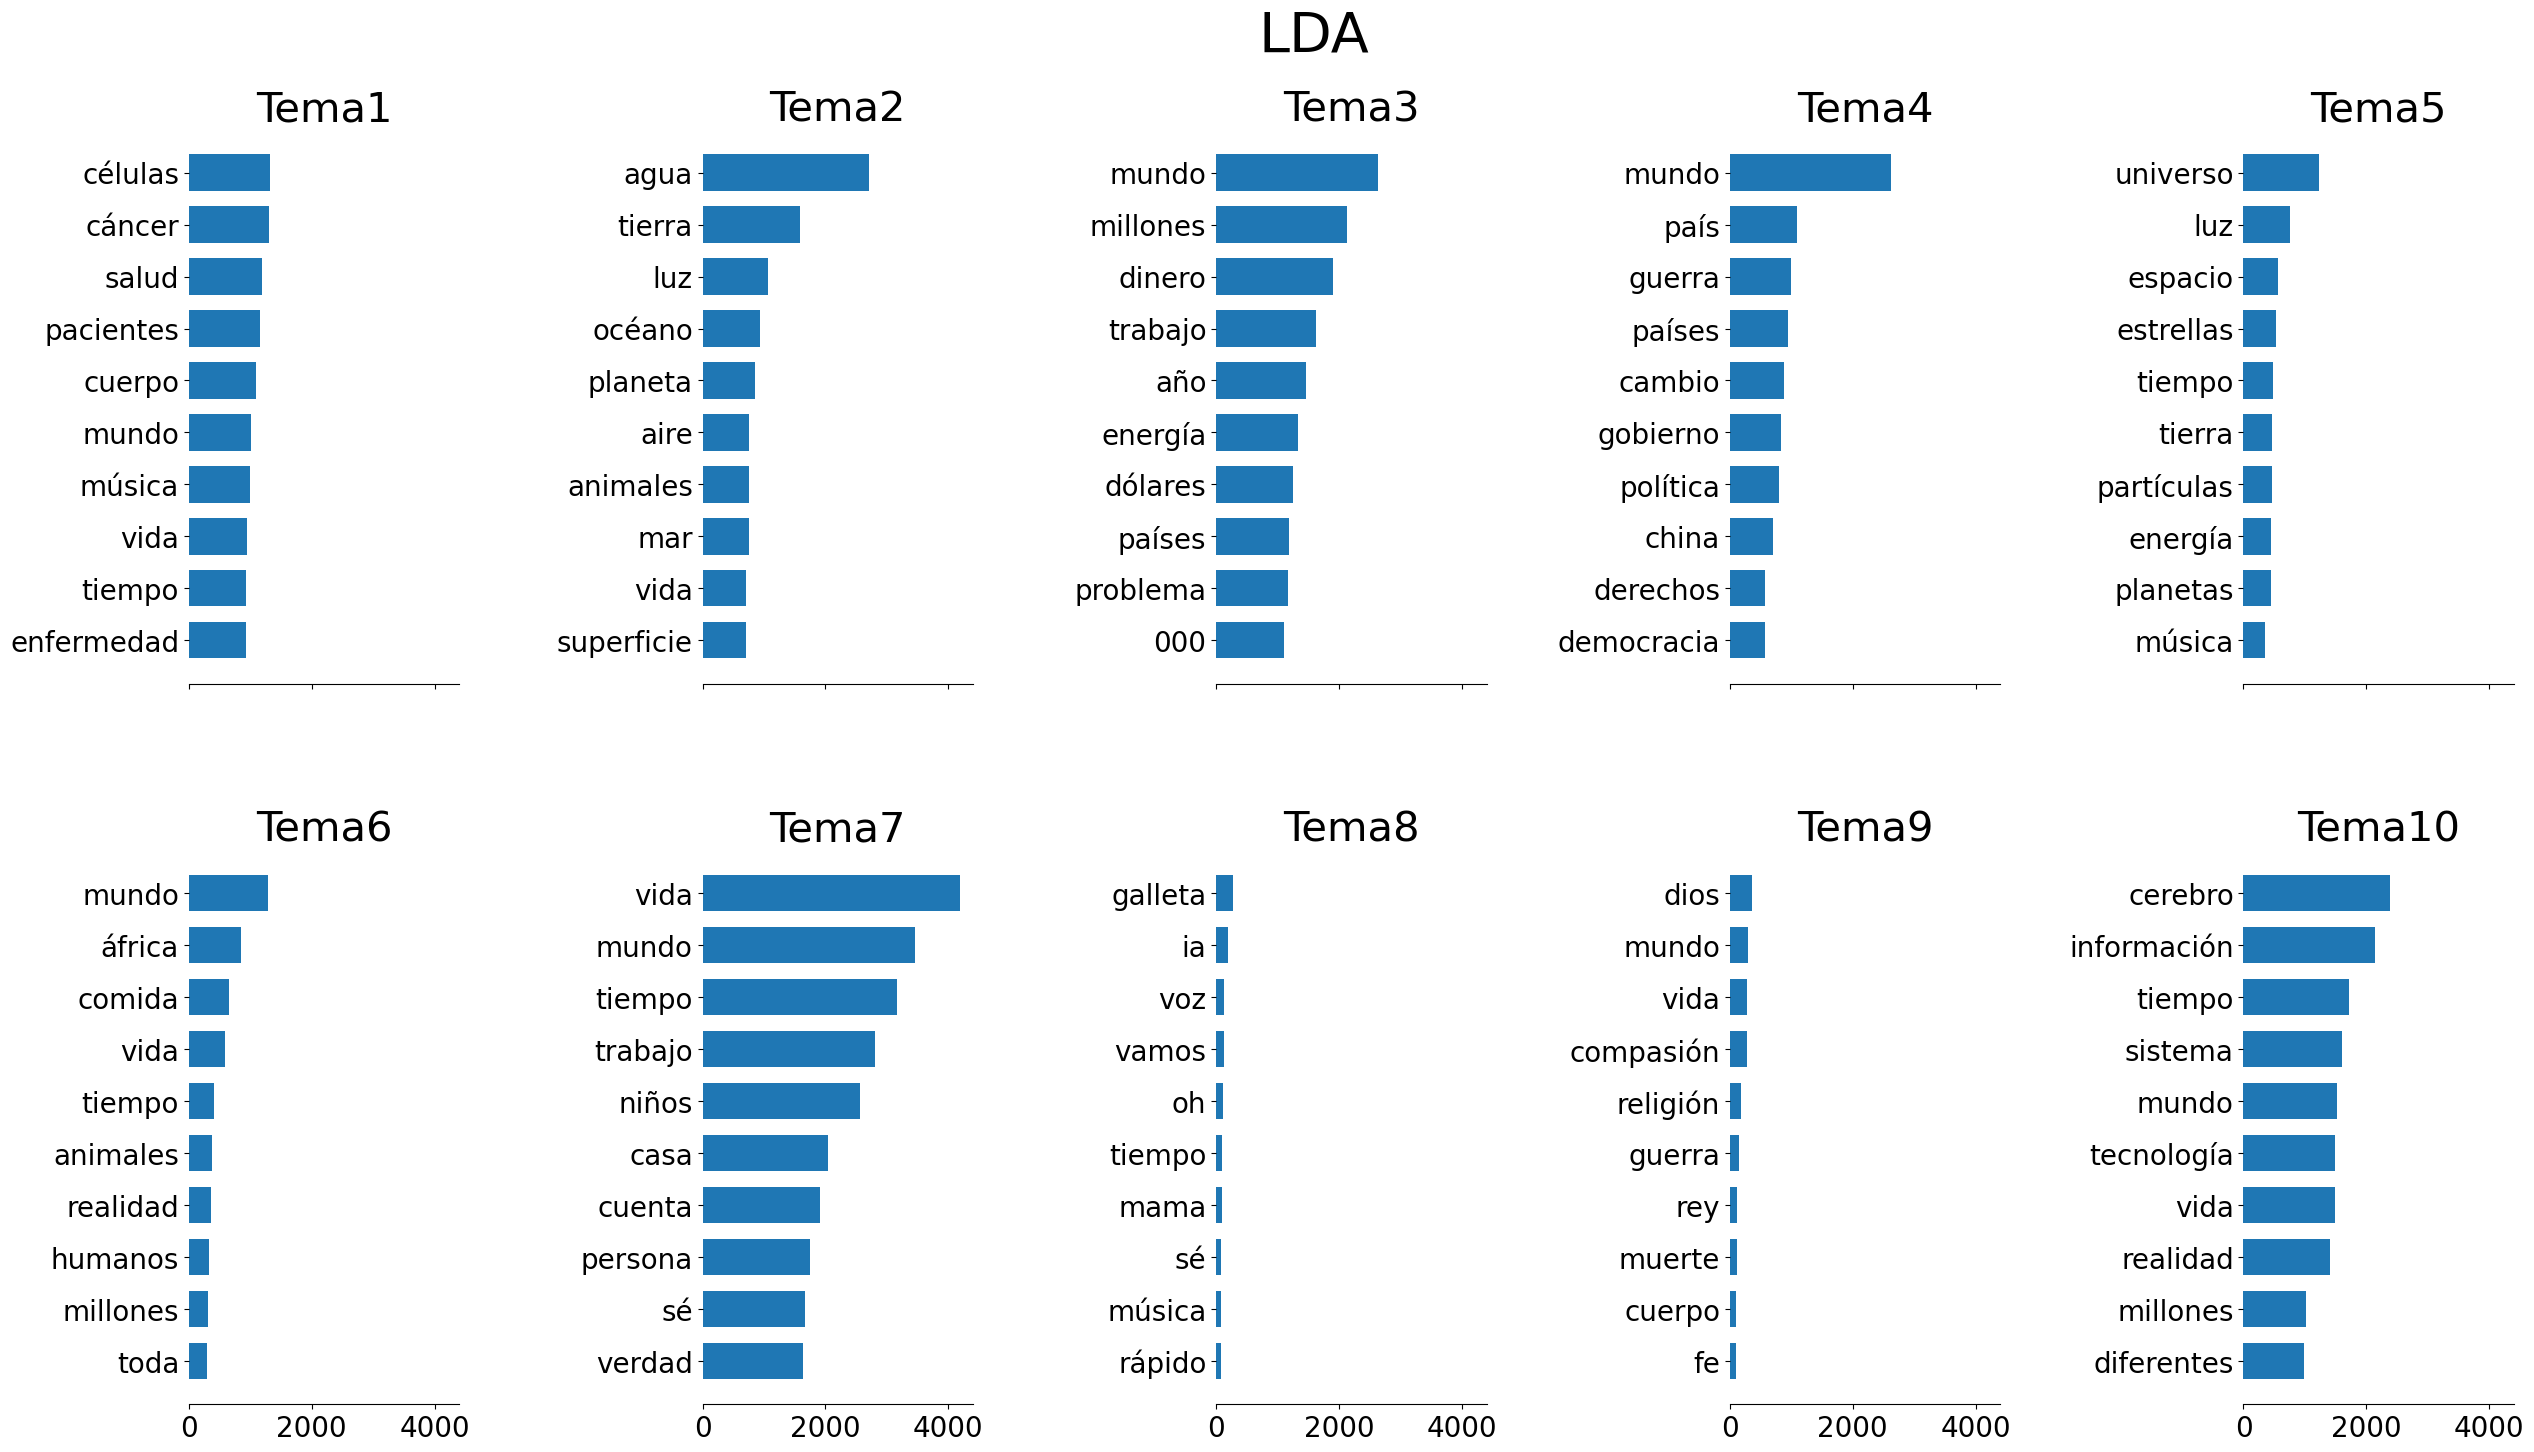

In [46]:
palabras = vectorizer.get_feature_names_out()
graficar_palabras_top(lda, palabras)

In [47]:
Z = lda.transform(X)

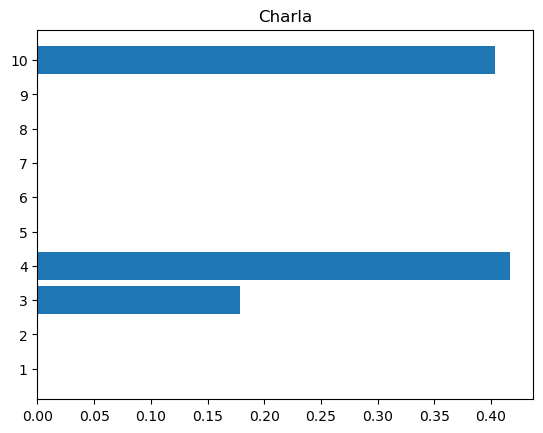

In [49]:
np.random.seed(1111)
i = np.random.choice(len(df))

z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title("Charla");